In [1]:
data <- read.csv("C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/Linear_regression_TSA/Automobile/automobile_cleaned.csv", header = TRUE)
data$name<-NULL
data$X <- NULL

In [2]:
#taking log of dependent variable
data$log_mpg <- log(data$mpg)
data$mpg <- NULL

In [3]:
#Install and load the necessary packages
#install.packages("ggplot2")  # Only if you haven't installed ggplot2
#install.packages("dplyr")
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



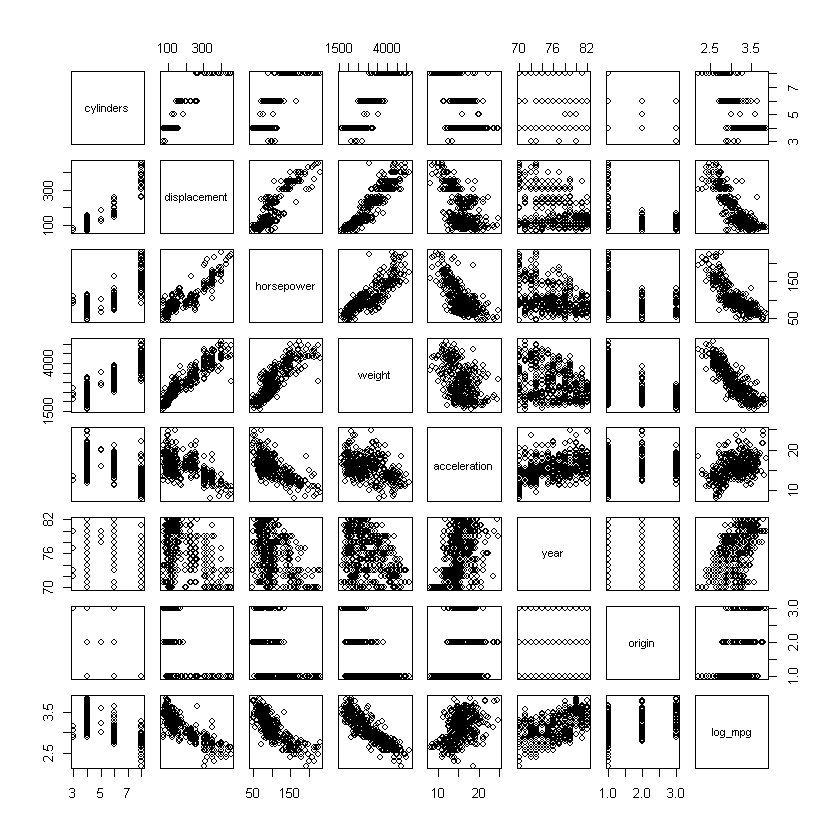

In [4]:
numeric_data <- data %>%
  select_if(is.numeric)
# Creating the scatterplot matrix with numerical columns
pairs(numeric_data)

In [5]:
# making dummy variables for origins
#install.packages("fastDummies")
library(fastDummies)
data_with_dummies_origin <- dummy_cols(data, select_columns = "origin")
data_with_dummies_origin$origin_1 <- NULL
data_with_dummies_origin$origin <- NULL

Thank you for using fastDummies!
To acknowledge our work, please cite the package:
Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.


In [6]:
#making dummy variables for years
data_with_dummies <- dummy_cols(data_with_dummies_origin, select_columns = "year")
data_with_dummies$year_70 <- NULL
data_with_dummies$year <- NULL

In [7]:
#making new columns
log_mpg<- data_with_dummies$log_mpg
horsepower<- data_with_dummies$horsepower
weight<- data_with_dummies$weight
origin_2<- data_with_dummies$origin_2
origin_3<- data_with_dummies$origin_3
year_71<- data_with_dummies$year_71
year_74<- data_with_dummies$year_74
year_75<- data_with_dummies$year_75
year_76<- data_with_dummies$year_76
year_77<- data_with_dummies$year_77
year_78<- data_with_dummies$year_78
year_79<- data_with_dummies$year_79
year_80<- data_with_dummies$year_80
year_81<- data_with_dummies$year_81
year_82<- data_with_dummies$year_82

In [8]:
#fitting full linear model on final data
summary(model_FL <- lm(log_mpg ~ .-year_72-year_73-acceleration-cylinders-displacement, data=data_with_dummies))
# all those preditors which are not significant are removed
anova(model_FL)

#finding the best 1st order model
#model_full <- lm(mpg ~ .-name, data=final_data)
summary(best_model_1st_order <- step(model_FL, direction='both'))


Call:
lm(formula = log_mpg ~ . - year_72 - year_73 - acceleration - 
    cylinders - displacement, data = data_with_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36670 -0.06599  0.00343  0.07334  0.35004 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.7567207  0.0341351 110.054  < 2e-16 ***
horsepower  -0.0010605  0.0003287  -3.226 0.001363 ** 
weight      -0.0002385  0.0000153 -15.592  < 2e-16 ***
origin_2     0.0696720  0.0175486   3.970 8.60e-05 ***
origin_3     0.0601729  0.0178539   3.370 0.000828 ***
year_71      0.0616643  0.0246788   2.499 0.012891 *  
year_74      0.0819464  0.0256652   3.193 0.001527 ** 
year_75      0.0676514  0.0245940   2.751 0.006233 ** 
year_76      0.0953616  0.0232325   4.105 4.97e-05 ***
year_77      0.1589415  0.0244355   6.505 2.48e-10 ***
year_78      0.1522094  0.0225017   6.764 5.12e-11 ***
year_79      0.2525280  0.0245811  10.273  < 2e-16 ***
year_80      0.3577979  0.0263078  13.60

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
horsepower,1,31.156784202,31.156784202,2539.4342228,1.442370e-169
weight,1,4.466080945,4.466080945,364.0080029,2.788603e-57
origin_2,1,0.001985617,0.001985617,0.1618377,6.876982e-01
origin_3,1,0.283432548,0.283432548,23.1011746,2.223589e-06
year_71,1,0.155479949,0.155479949,12.6723959,4.185307e-04
year_74,1,0.161520015,0.161520015,13.1646915,3.245776e-04
year_75,1,0.272971308,0.272971308,22.2485311,3.379140e-06
year_76,1,0.187563410,0.187563410,15.2873589,1.094807e-04
year_77,1,0.002994402,0.002994402,0.2440588,6.215776e-01
year_78,1,0.022958344,0.022958344,1.8712202,1.721502e-01


Start:  AIC=-1710.36
log_mpg ~ (cylinders + displacement + horsepower + weight + acceleration + 
    origin_2 + origin_3 + year_71 + year_72 + year_73 + year_74 + 
    year_75 + year_76 + year_77 + year_78 + year_79 + year_80 + 
    year_81 + year_82) - year_72 - year_73 - acceleration - cylinders - 
    displacement

             Df Sum of Sq    RSS     AIC
<none>                    4.6255 -1710.4
- year_71     1   0.07660 4.7021 -1705.9
- year_75     1   0.09283 4.7183 -1704.6
- year_74     1   0.12508 4.7506 -1701.9
- horsepower  1   0.12772 4.7532 -1701.7
- origin_3    1   0.13936 4.7648 -1700.7
- origin_2    1   0.19340 4.8189 -1696.3
- year_76     1   0.20671 4.8322 -1695.2
- year_77     1   0.51909 5.1446 -1670.7
- year_78     1   0.56139 5.1869 -1667.5
- year_79     1   1.29489 5.9204 -1615.6
- year_81     1   1.53080 6.1563 -1600.3
- year_82     1   2.24812 6.8736 -1557.1
- year_80     1   2.26945 6.8949 -1555.9
- weight      1   2.98263 7.6081 -1517.3



Call:
lm(formula = log_mpg ~ (cylinders + displacement + horsepower + 
    weight + acceleration + origin_2 + origin_3 + year_71 + year_72 + 
    year_73 + year_74 + year_75 + year_76 + year_77 + year_78 + 
    year_79 + year_80 + year_81 + year_82) - year_72 - year_73 - 
    acceleration - cylinders - displacement, data = data_with_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36670 -0.06599  0.00343  0.07334  0.35004 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.7567207  0.0341351 110.054  < 2e-16 ***
horsepower  -0.0010605  0.0003287  -3.226 0.001363 ** 
weight      -0.0002385  0.0000153 -15.592  < 2e-16 ***
origin_2     0.0696720  0.0175486   3.970 8.60e-05 ***
origin_3     0.0601729  0.0178539   3.370 0.000828 ***
year_71      0.0616643  0.0246788   2.499 0.012891 *  
year_74      0.0819464  0.0256652   3.193 0.001527 ** 
year_75      0.0676514  0.0245940   2.751 0.006233 ** 
year_76      0.0953616  0.0232325   4.105

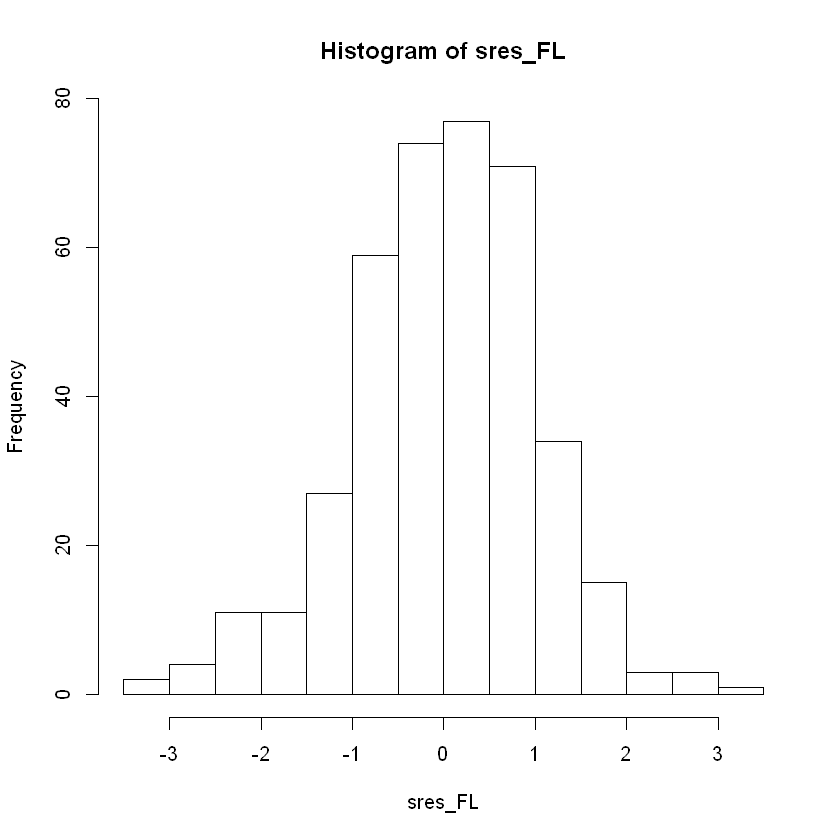

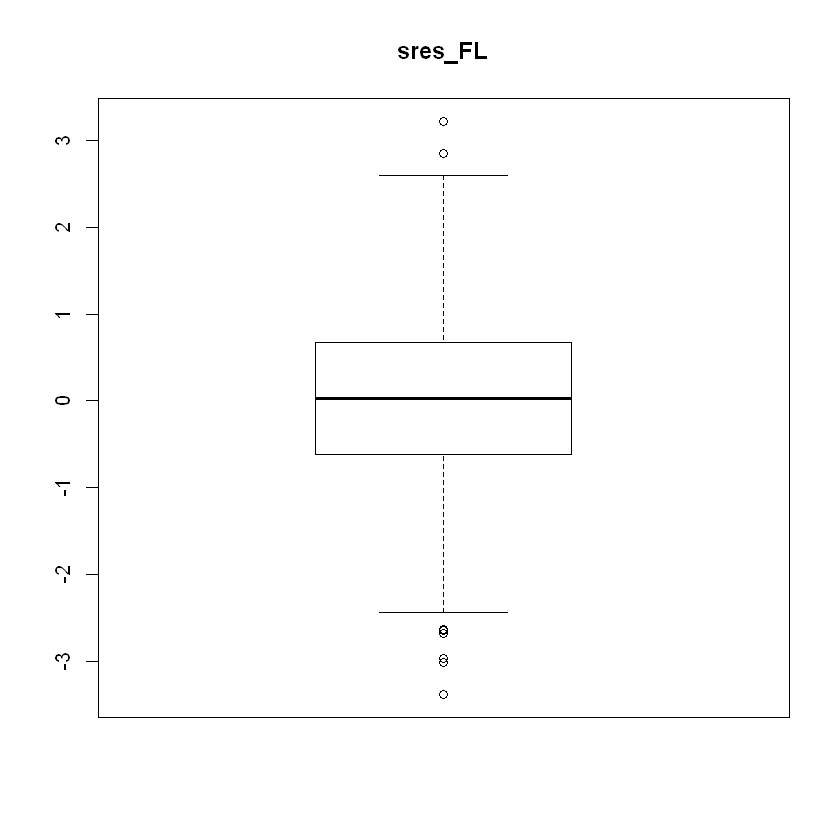

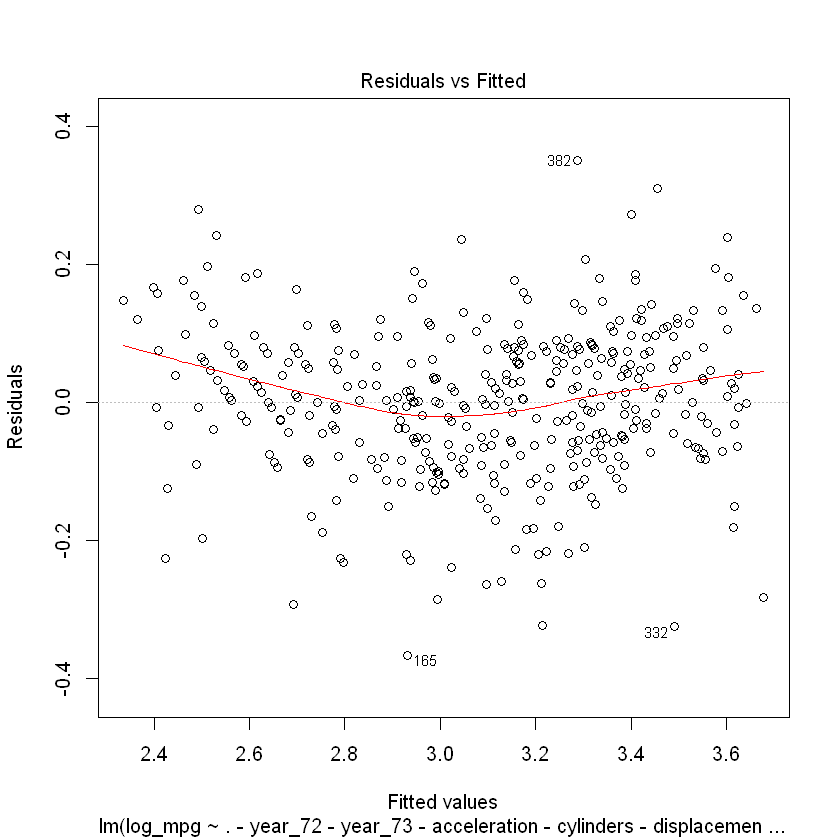

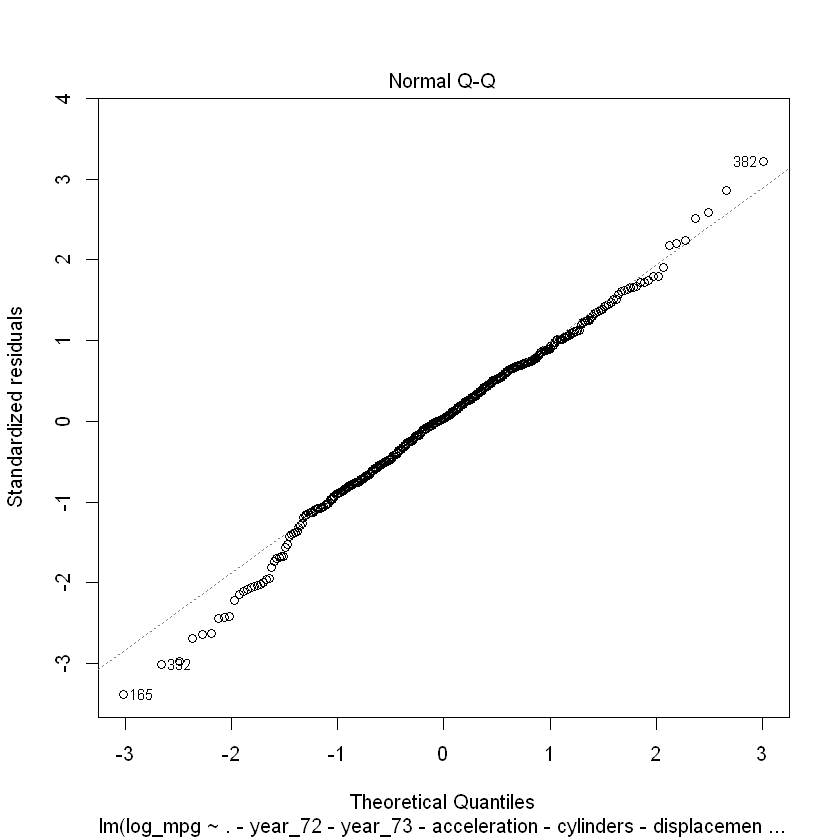

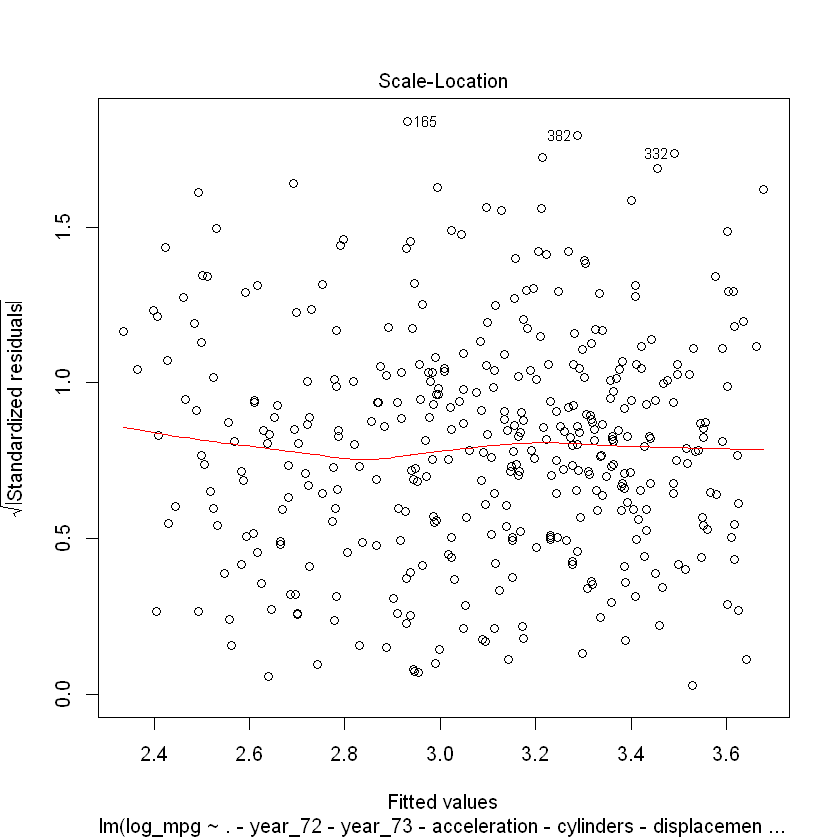


	Shapiro-Wilk normality test

data:  sres_FL
W = 0.98978, p-value = 0.007851


ERROR: Error in library(nortest): there is no package called 'nortest'


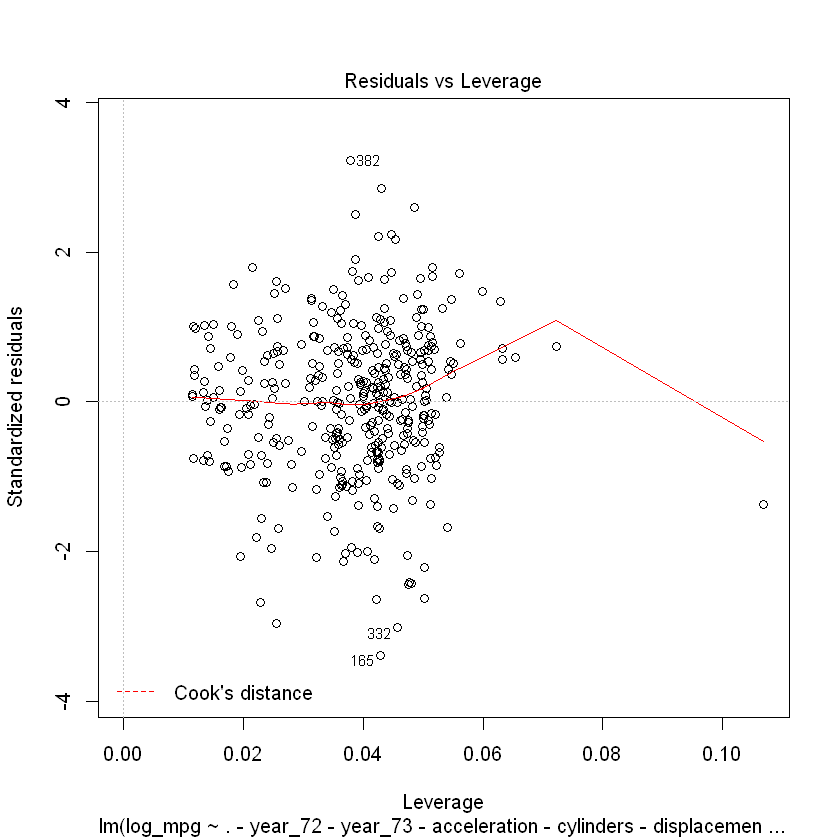

In [9]:
#checking the assumptions
sres_FL<-residuals(best_model_1st_order)/(0.1108*sqrt(1-influence(best_model_1st_order)$hat))
hist(sres_FL)
boxplot(sres_FL,main="sres_FL")
plot(model_FL)    # there is clear pattern in the residual vs fitted value plot , hence we will go for higher order terms
result_shapiro <- shapiro.test(sres_FL)
result_shapiro
#install.packages('nortest')
library(nortest)
result_anderson <- ad.test(sres_FL)
result_anderson                         #best 1st order model is not normal
library(lmtest)
bptest(best_model_1st_order)            #best 1st order model is homoskeastic

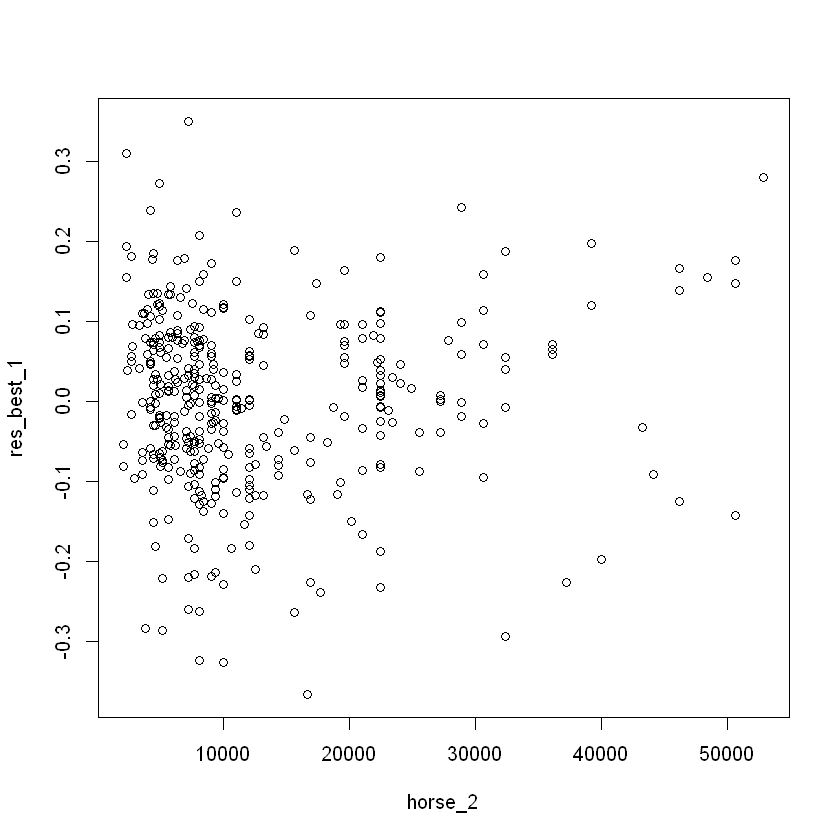

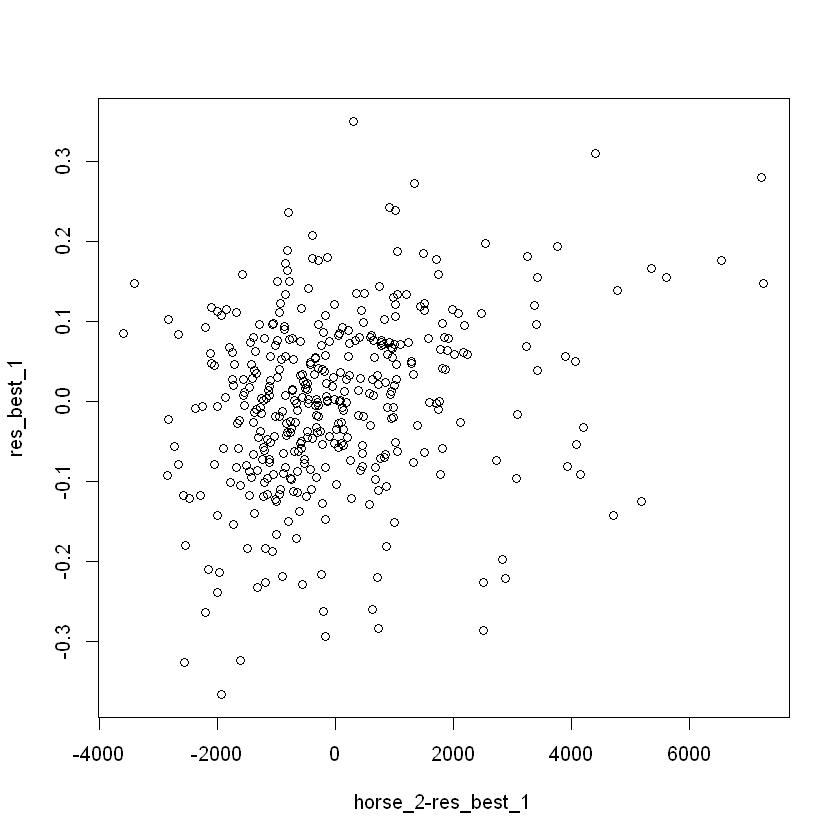

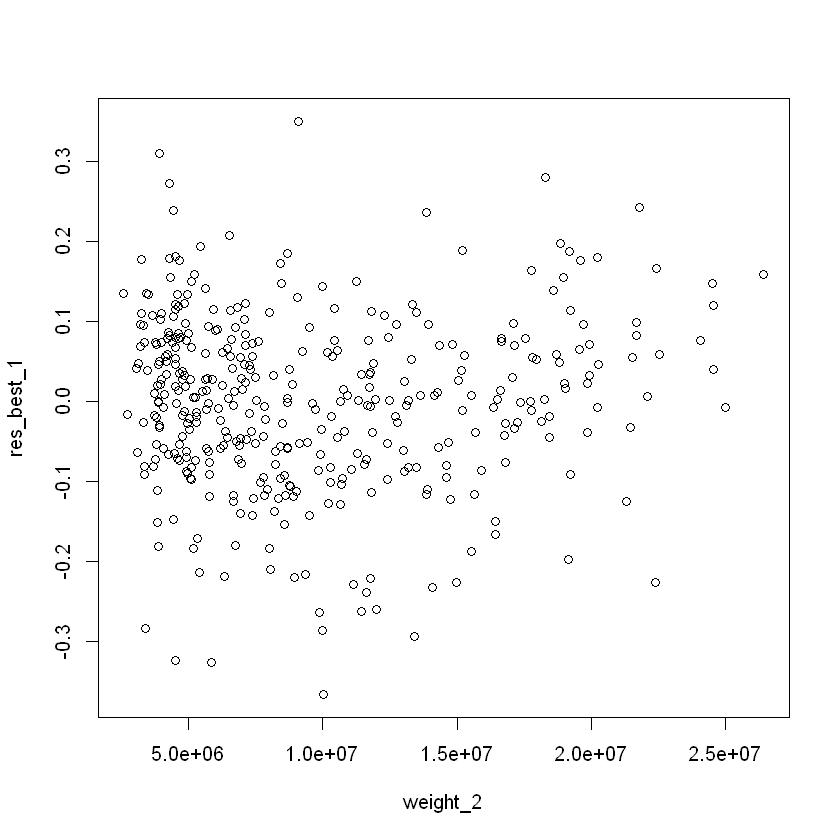

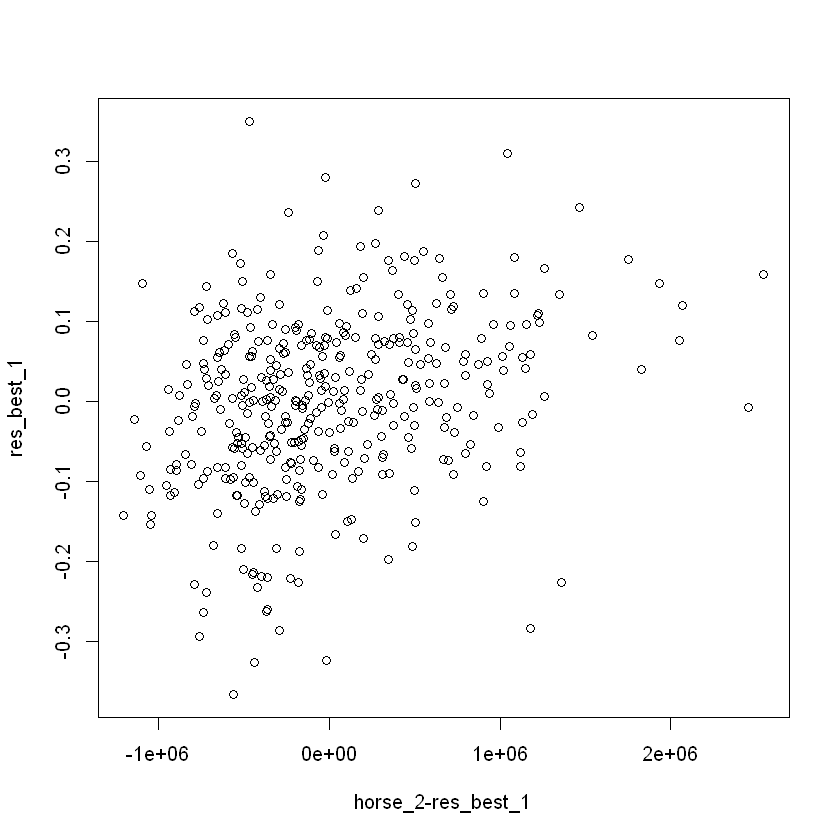

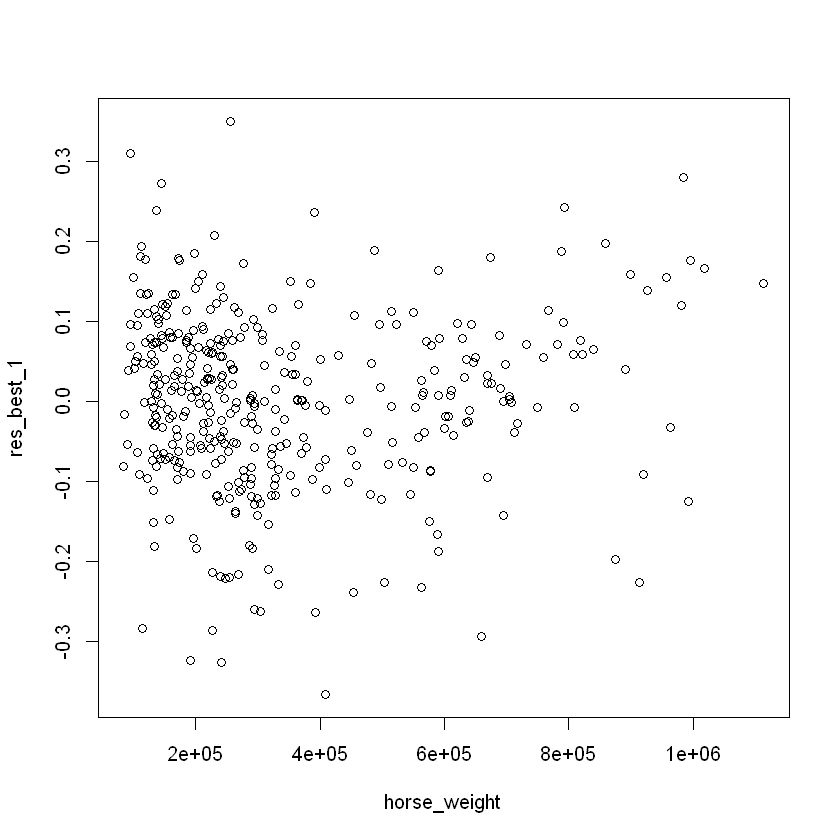

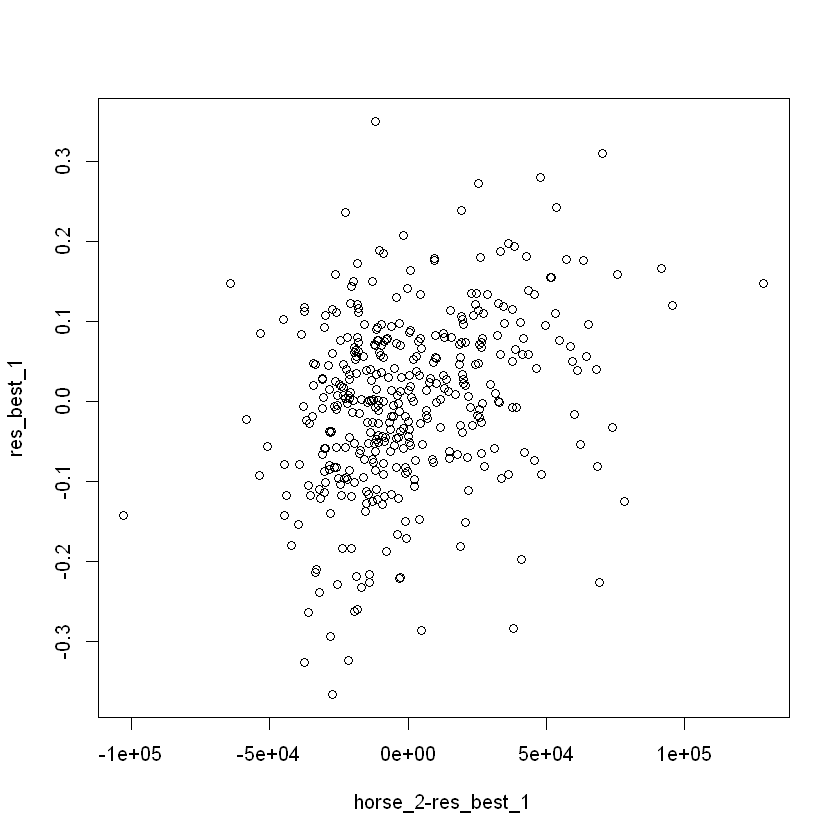

In [10]:
#graphically checking for the significance of interaction and square terms
horse_2<-horsepower*horsepower
res_best_1<-residuals(best_model_1st_order)
plot(horse_2,res_best_1)
plot(residuals(lm(horse_2~horsepower + weight + year_71 + year_74 + year_75 + year_76 + year_77 + year_78 + year_79 + year_80 + year_81 + year_82 + origin_2 + origin_3)),res_best_1,xlab="horse_2-res_best_1")

weight_2<-weight*weight
res_best_1<-residuals(best_model_1st_order)
plot(weight_2,res_best_1)
plot(residuals(lm(weight_2~ horsepower + weight + year_71 + year_74 + year_75 + year_76 + year_77 + year_78 + year_79 + year_80 + year_81 + year_82 + origin_2 + origin_3)),res_best_1,xlab="horse_2-res_best_1")

horse_weight<-horsepower*weight    
res_best_1<-residuals(best_model_1st_order)
plot(horse_weight,res_best_1)
plot(residuals(lm(horse_weight~horsepower + weight + year_71 + year_74 + year_75 + year_76 + year_77 + year_78 + year_79 + year_80 + year_81 + year_82 + origin_2 + origin_3)),res_best_1,xlab="horse_2-res_best_1")
# from the scatterplot it seems that this interaction term will not be sig nificantin presence of other predictors.

In [11]:
#finding the best 2nd order model
summary(model_FL_2<- lm(log_mpg ~ I(horsepower*horsepower) + I(weight*weight) + horsepower + weight + year_71 + year_74 + year_75 + year_76 + year_77 + year_78 + year_79 + year_80 + year_81 + year_82 + origin_2 + origin_3,  data = data_with_dummies))
summary(best_model_2 <- step(model_FL_2, direction='both'))


Call:
lm(formula = log_mpg ~ I(horsepower * horsepower) + I(weight * 
    weight) + horsepower + weight + year_71 + year_74 + year_75 + 
    year_76 + year_77 + year_78 + year_79 + year_80 + year_81 + 
    year_82 + origin_2 + origin_3, data = data_with_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33470 -0.05689  0.00711  0.06796  0.36488 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.244e+00  8.980e-02  47.263  < 2e-16 ***
I(horsepower * horsepower)  8.987e-06  3.884e-06   2.314 0.021231 *  
I(weight * weight)          3.756e-08  1.010e-08   3.721 0.000229 ***
horsepower                 -3.747e-03  1.104e-03  -3.395 0.000759 ***
weight                     -4.649e-04  6.878e-05  -6.760 5.31e-11 ***
year_71                     5.165e-02  2.382e-02   2.168 0.030762 *  
year_74                     7.569e-02  2.452e-02   3.087 0.002175 ** 
year_75                     7.884e-02  2.346e-02   3.361 

Start:  AIC=-1747.61
log_mpg ~ I(horsepower * horsepower) + I(weight * weight) + horsepower + 
    weight + year_71 + year_74 + year_75 + year_76 + year_77 + 
    year_78 + year_79 + year_80 + year_81 + year_82 + origin_2 + 
    origin_3

                             Df Sum of Sq    RSS     AIC
<none>                                    4.1634 -1747.6
- origin_3                    1   0.05034 4.2138 -1744.9
- year_71                     1   0.05220 4.2156 -1744.7
- I(horsepower * horsepower)  1   0.05943 4.2228 -1744.1
- year_74                     1   0.10577 4.2692 -1739.8
- origin_2                    1   0.10904 4.2725 -1739.5
- year_75                     1   0.12539 4.2888 -1738.0
- horsepower                  1   0.12798 4.2914 -1737.7
- I(weight * weight)          1   0.15370 4.3171 -1735.4
- year_76                     1   0.23285 4.3963 -1728.3
- weight                      1   0.50728 4.6707 -1704.5
- year_77                     1   0.53161 4.6950 -1702.5
- year_78           


Call:
lm(formula = log_mpg ~ I(horsepower * horsepower) + I(weight * 
    weight) + horsepower + weight + year_71 + year_74 + year_75 + 
    year_76 + year_77 + year_78 + year_79 + year_80 + year_81 + 
    year_82 + origin_2 + origin_3, data = data_with_dummies)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33470 -0.05689  0.00711  0.06796  0.36488 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.244e+00  8.980e-02  47.263  < 2e-16 ***
I(horsepower * horsepower)  8.987e-06  3.884e-06   2.314 0.021231 *  
I(weight * weight)          3.756e-08  1.010e-08   3.721 0.000229 ***
horsepower                 -3.747e-03  1.104e-03  -3.395 0.000759 ***
weight                     -4.649e-04  6.878e-05  -6.760 5.31e-11 ***
year_71                     5.165e-02  2.382e-02   2.168 0.030762 *  
year_74                     7.569e-02  2.452e-02   3.087 0.002175 ** 
year_75                     7.884e-02  2.346e-02   3.361 

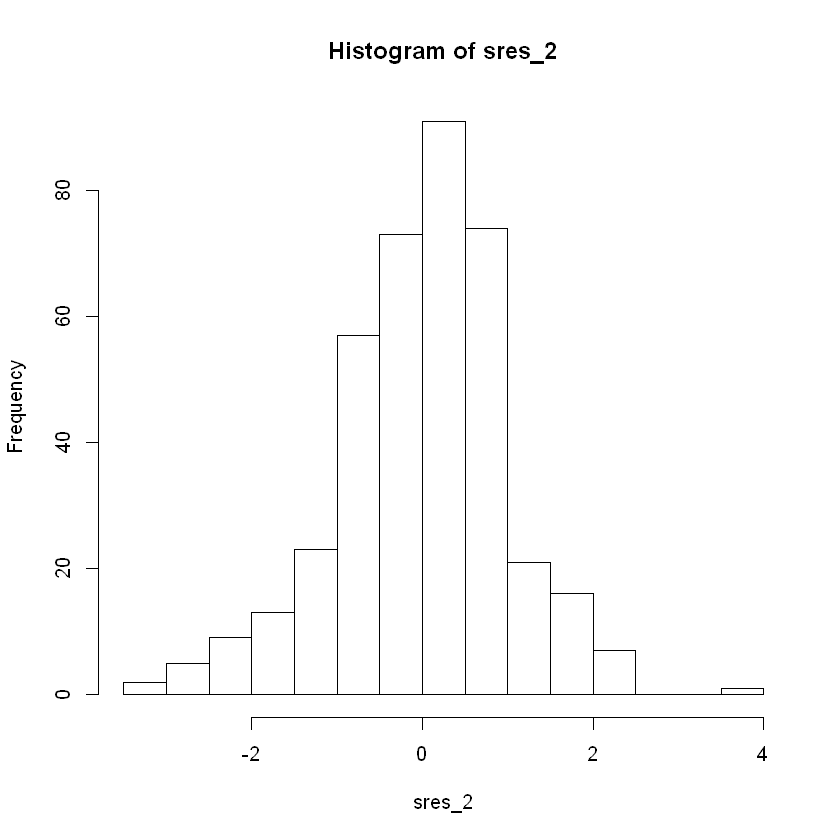

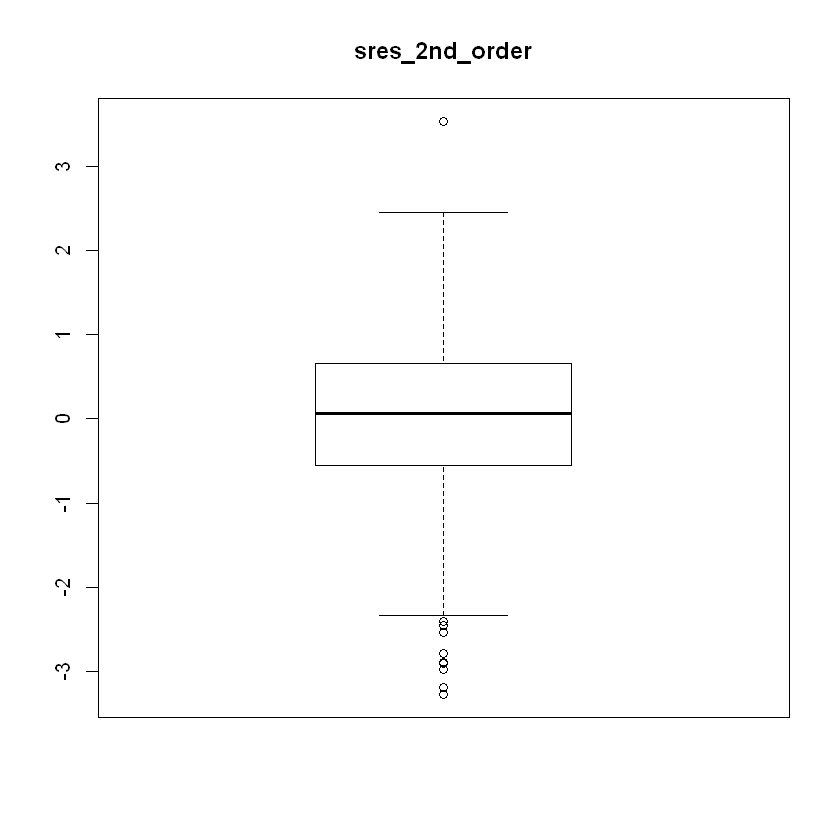

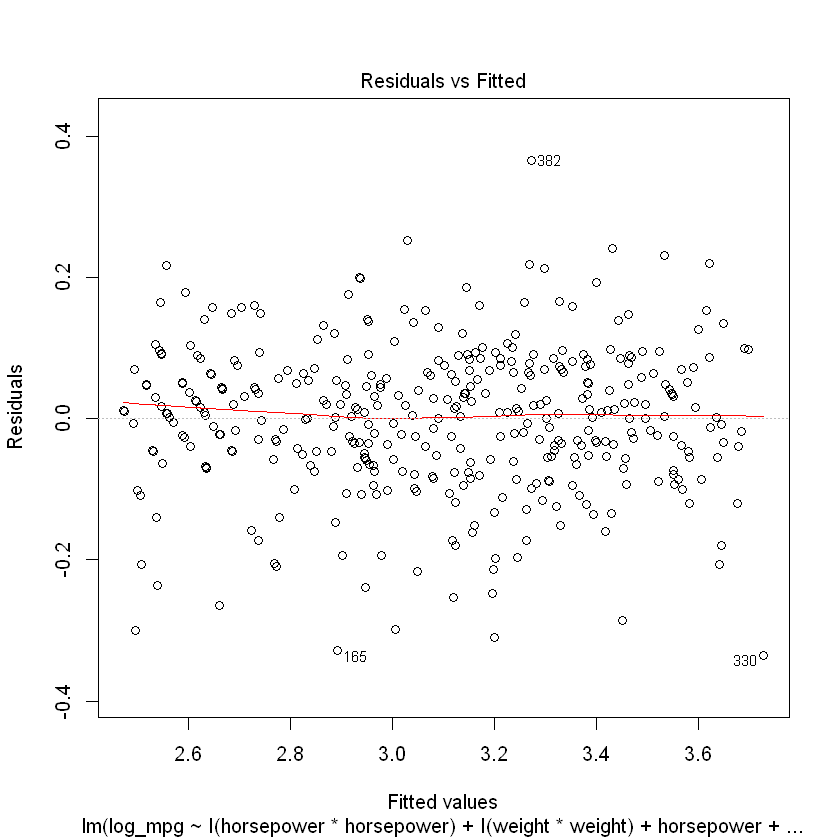

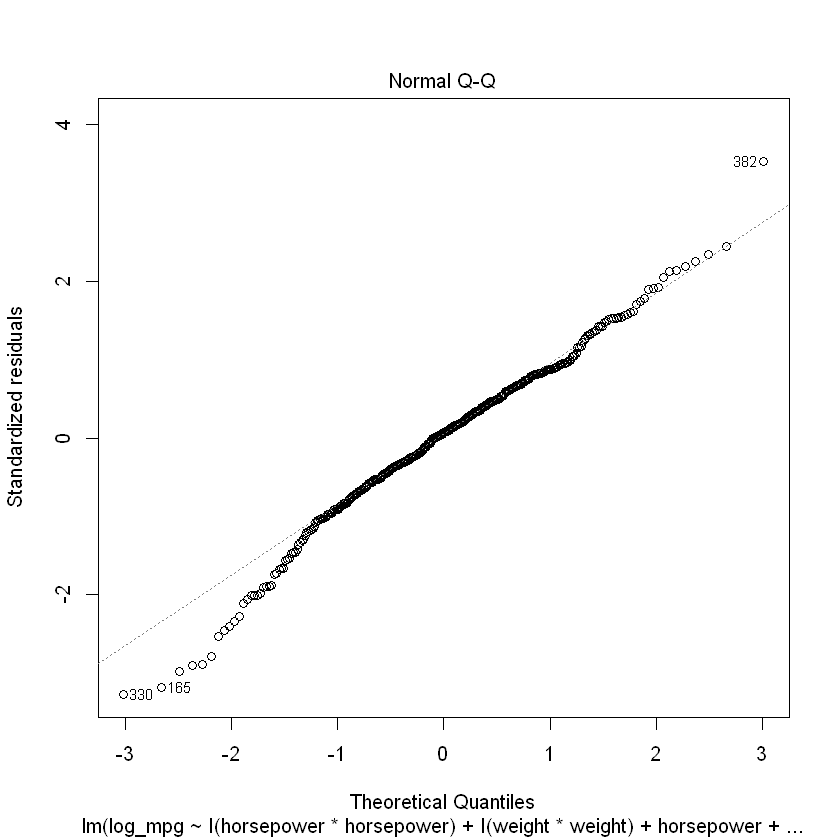

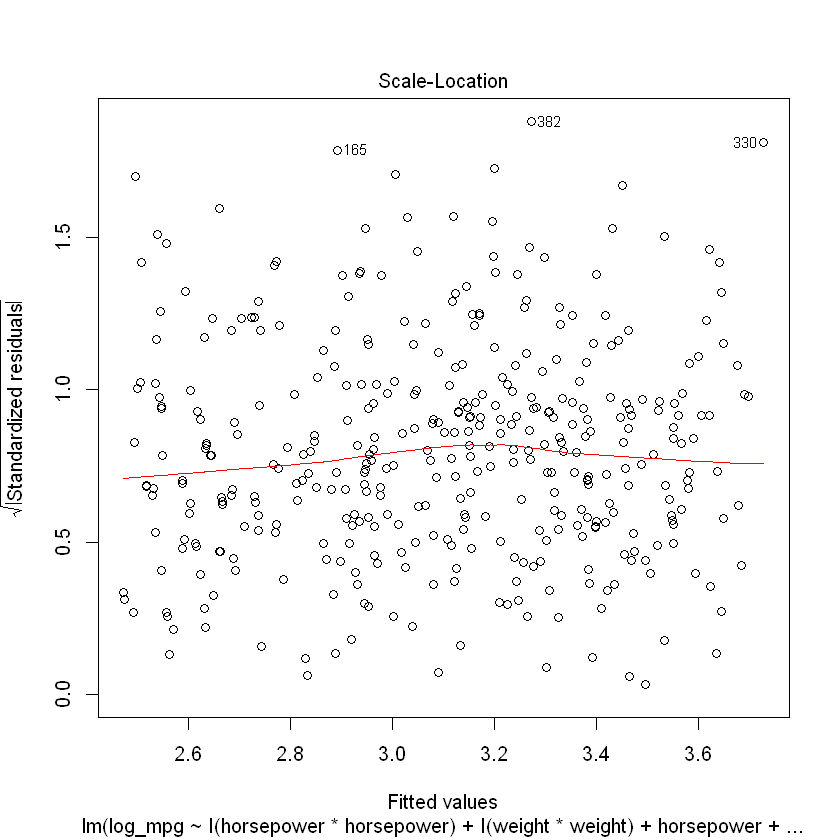


	Shapiro-Wilk normality test

data:  sres_2
W = 0.98559, p-value = 0.0006143


ERROR: Error in library(nortest): there is no package called 'nortest'


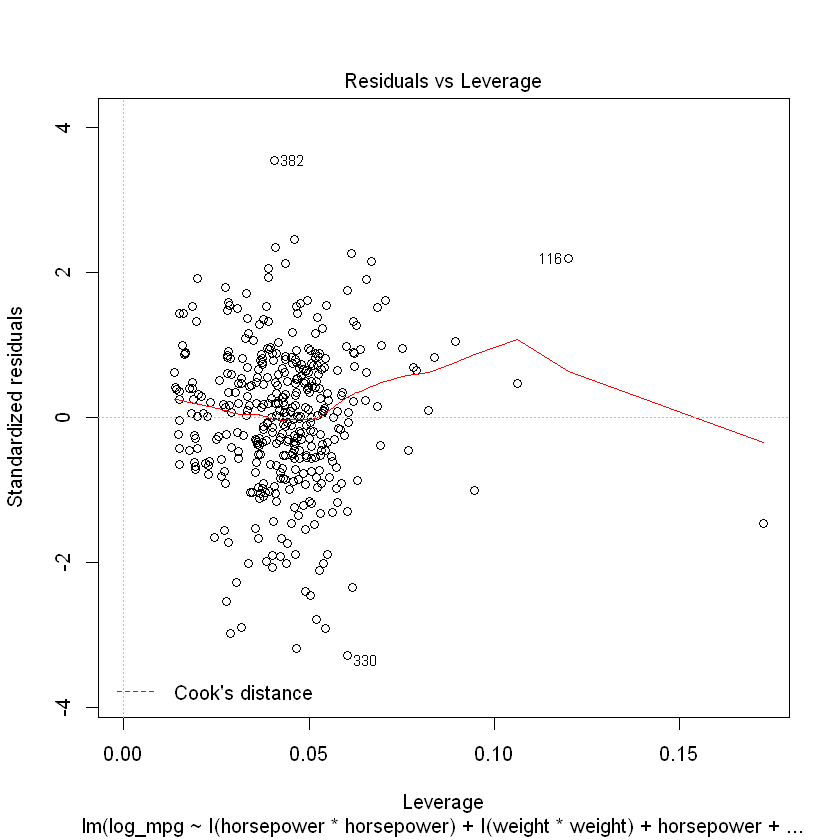

In [12]:
#checking the assumptions
sres_2<-residuals(best_model_2)/(0.1054*sqrt(1-influence(best_model_2)$hat))
hist(sres_2)
boxplot(sres_2,main="sres_2nd_order")
plot(best_model_2)     # no pattern in the residual vs fitted value plot, hence no need to include further higher terms
result_shapiro <- shapiro.test(sres_2)
result_shapiro
#install.packages('nortest')
library(nortest)
result_anderson <- ad.test(sres_2)
result_anderson
#errors are not normally distributed

#test for homoskedasticity
#install.packages('lmtest')
library(lmtest)
bptest(best_model_2)    #not normal but homoskedastic and no pattern in the residual vs fitted values plot